In [1]:
#/
# PERGUNTA 1- Qual a correlação entre os Atributos do Funcionários?
# PERGUNTA 2- Qual o tempo de serviço da maioria dos Funcionários?
# PERGUNTA 3- Qual a avaliação do ano anterior mais Comum?
# PERGUNTA 4- Qual a distribuição das idades dos Funcionários?
# PERGUNTA 5- Qual o número de treinamentos mais Frequente?
# PERGUNTA 6- Qual a proporção dos funcionários por Canal de Recrutamento?
# PERGUNTA 7- Qual a relação entre a promoção e a Avaliação do Ano Interior?
# OBJETIVO - Limpar e preparar os dados para então contruir um dashboard no PBI para apresentar seus resultados
# /#

#versao da linguagem python 
from platform import python_version
print('versao da linguagem python usada: ', python_version())

versao da linguagem python usada:  3.9.12


In [2]:
#Pacote usado para gravar as versões de outros pacotes usados nesse jupyter notebook

!pip install -q -U watermark

In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Versoes dos pacotes
%reload_ext watermark
%watermark -a "Data Science Academy" --inversions

In [2]:
#Carregando dados
import pandas as pd
dadosRH = pd.read_csv(r'C:\Users\raphael.lopes\OneDrive - ORIGO ENERGIA\Área de Trabalho\Bases\21-Cap13\dadosRH.csv')

dadosRH.head()

dadosRH.shape

(54808, 11)

In [3]:
#Limpeza e transformação dos dados

dadosRH.isnull().sum()

id_funcionario            0
departmento               0
regiao                    0
educacao               2409
genero                    0
canal_recrutamento        0
numero_treinamentos       0
idade                     0
aval_ano_anterior      4124
tempo_servico             0
promovido                 0
dtype: int64

In [11]:
dadosRH.groupby(['educacao']).count()

,id_funcionario,departmento,regiao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
educacao,,,,,,,,,,
Ensino Medio,805,805,805,805,805,805,805,805,805,805
Mestrado ou Doutorado,14925,14925,14925,14925,14925,14925,14925,14925,14925,14925
Superior,39078,39078,39078,39078,39078,39078,39078,39078,39078,39078


c:\Users\raphael.lopes\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='educacao', ylabel='count'>

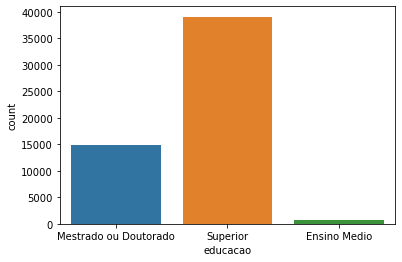

In [12]:
#Grafico de barra para analisar quantidade de funcionarios por grau de educação
sns.countplot(dadosRH['educacao'])

In [13]:
dadosRH.groupby(['aval_ano_anterior']).count()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,tempo_servico,promovido
aval_ano_anterior,,,,,,,,,,
1.0,6223,6223,6223,6223,6223,6223,6223,6223,6223,6223
2.0,4225,4225,4225,4225,4225,4225,4225,4225,4225,4225
3.0,22742,22742,22742,22742,22742,22742,22742,22742,22742,22742
4.0,9877,9877,9877,9877,9877,9877,9877,9877,9877,9877
5.0,11741,11741,11741,11741,11741,11741,11741,11741,11741,11741


c:\Users\raphael.lopes\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='aval_ano_anterior', ylabel='count'>

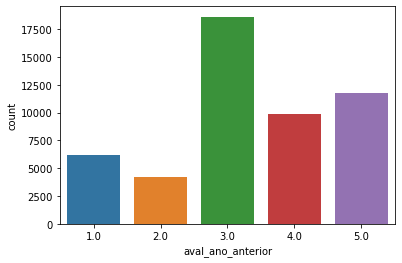

In [14]:
sns.countplot(dadosRH['aval_ano_anterior'])


In [5]:
dadosRH.groupby(['aval_ano_anterior']).count()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,tempo_servico,promovido
aval_ano_anterior,,,,,,,,,,
1.0,6223,6223,6223,5887,6223,6223,6223,6223,6223,6223
2.0,4225,4225,4225,4035,4225,4225,4225,4225,4225,4225
3.0,18618,18618,18618,17867,18618,18618,18618,18618,18618,18618
4.0,9877,9877,9877,9509,9877,9877,9877,9877,9877,9877
5.0,11741,11741,11741,11362,11741,11741,11741,11741,11741,11741


In [4]:
#Aplicando imputação e preenchendo valores nulos

dadosRH['educacao'].fillna(dadosRH['educacao'].mode()[0],inplace=True)

In [5]:
dadosRH['aval_ano_anterior'].fillna(dadosRH['aval_ano_anterior'].median(),inplace=True)

In [6]:
#Verificar o balanceamento da classe n variavel promovido

dadosRH.groupby(['promovido']).count()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico
promovido,,,,,,,,,,
0,50140,50140,50140,50140,50140,50140,50140,50140,50140,50140
1,4668,4668,4668,4668,4668,4668,4668,4668,4668,4668


c:\Users\raphael.lopes\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='promovido', ylabel='count'>

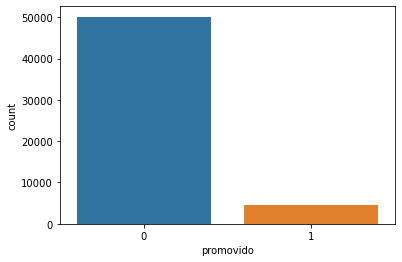

In [5]:
sns.countplot(dadosRH['promovido'])

In [7]:
#Separar a classe majoritaria para a classe minoritaria

df_classe_majoritaria = dadosRH[dadosRH.promovido==0]
df_classe_minoritaria = dadosRH[dadosRH.promovido==1]

In [10]:
df_classe_majoritaria.shape


(50140, 11)

In [9]:
df_classe_minoritaria.shape

(4668, 11)

In [11]:
#Upsample da classe minoritaria

from sklearn.utils import resample
df_classe_minoritaria_upsample = resample(df_classe_minoritaria,replace=True,n_samples=50140,random_state=150)

In [12]:
dadosRH_balanceados = pd.concat([df_classe_majoritaria,df_classe_minoritaria_upsample])

In [13]:
dadosRH_balanceados.promovido.value_counts()

0    50140
1    50140
Name: promovido, dtype: int64

In [14]:
dadosRH_balanceados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100280 entries, 0 to 5869
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id_funcionario       100280 non-null  int64  
 1   departmento          100280 non-null  object 
 2   regiao               100280 non-null  object 
 3   educacao             100280 non-null  object 
 4   genero               100280 non-null  object 
 5   canal_recrutamento   100280 non-null  object 
 6   numero_treinamentos  100280 non-null  int64  
 7   idade                100280 non-null  int64  
 8   aval_ano_anterior    100280 non-null  float64
 9   tempo_servico        100280 non-null  int64  
 10  promovido            100280 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 9.2+ MB


c:\Users\raphael.lopes\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='promovido', ylabel='count'>

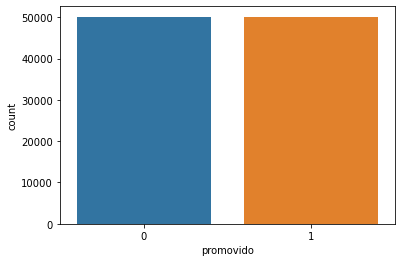

In [15]:
sns.countplot(dadosRH_balanceados['promovido'])

In [16]:
#salvando nova base
dadosRH_balanceados.to_csv(r'C:\Users\raphael.lopes\OneDrive - ORIGO ENERGIA\Área de Trabalho\Bases\21-Cap13\dadosRH_modificado.csv',encoding = 'utf-8', index = False)

A partir de agora, já fizemos o processo de data_cleaning e vamos seguir utilizando a base manipulada

Agora seguimos com o trabalho de analise de dados

In [18]:
dataset = pd.read_csv(r'C:\Users\raphael.lopes\OneDrive - ORIGO ENERGIA\Área de Trabalho\Bases\21-Cap13\dadosRH_modificado.csv')
dataset.head()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
0,65438,Marketing,Sudeste,Mestrado ou Doutorado,F,Outsourcing,1,35,5.0,8,0
1,65141,Logistica,Nordeste,Superior,M,Outro,1,30,5.0,4,0
2,7513,Marketing,Sudeste,Superior,M,Outsourcing,1,34,3.0,7,0
3,2542,Marketing,Norte,Superior,M,Outro,2,39,1.0,10,0
4,48945,Tecnologia,Nordeste,Superior,M,Outro,1,45,3.0,2,0
